In [8]:
# Click "Run" above on each cell

# Import geopandas library and abbreviate it to gpd
import geopandas as gpd

# Load our geospatial data source into memory, converting it into geographic coordinates (EPSG:4326)
viirs_sample_gdf = gpd.read_file('sample_data/viirs_permian_FRP_one_year.geojson').to_crs(4326)

In [9]:
# Preview table
viirs_sample_gdf

,id_,confidence,power,source_id,aq_date,geometry
0,187962906,8.0,3.581119,805967,2021-04-26T20:06:00,POINT (-100.68330 32.05043)
1,188007665,8.0,0.311613,806285,2021-04-27T08:30:00,POINT (-104.16735 32.81144)
2,188007673,8.0,0.606872,806285,2021-04-27T08:30:00,POINT (-104.47808 32.65243)
3,188007674,8.0,0.321881,806285,2021-04-27T08:30:00,POINT (-104.44855 32.63775)
4,188007675,8.0,0.973304,806285,2021-04-27T08:30:00,POINT (-104.46913 32.62636)
...,...,...,...,...,...,...
12477,207574342,7.0,1.971416,891173,2022-04-22T20:42:00,POINT (-104.21263 31.82086)
12478,207574343,7.0,1.901346,891173,2022-04-22T20:42:00,POINT (-104.22495 31.88137)
12479,207574346,8.0,3.495035,891173,2022-04-22T20:42:00,POINT (-103.31558 32.16309)
12480,207574347,8.0,3.437245,891173,2022-04-22T20:42:00,POINT (-103.31931 32.16308)


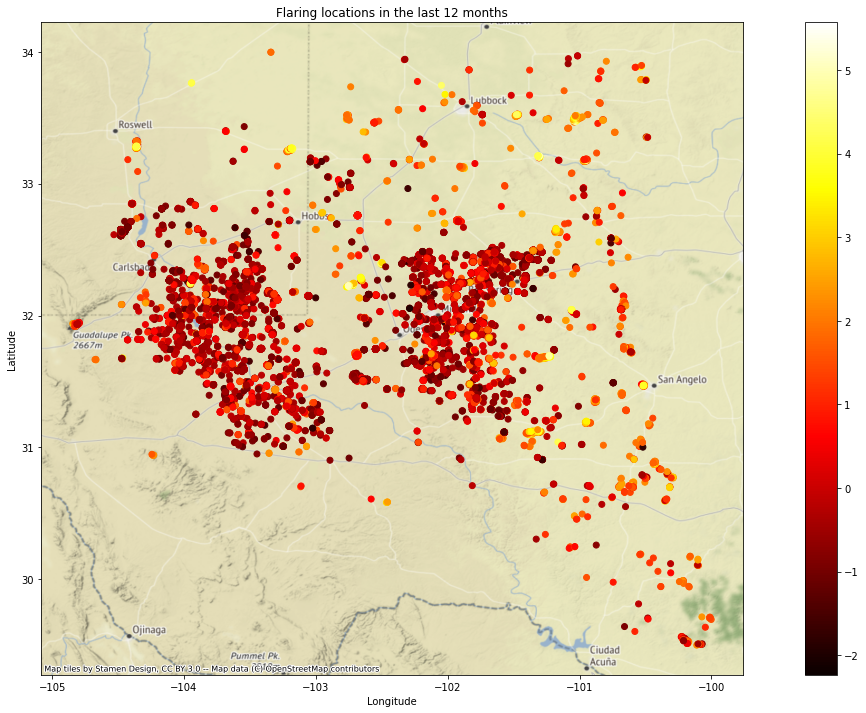

In [15]:
# Load in matplotlib, numpy and contextily
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(22, 12))

# Create a new column that is the log of column 'power', as the colours look better
viirs_sample_gdf['log_power'] = np.log(viirs_sample_gdf['power'])
# Plot points in axes coloured scale set by 'log_power'
viirs_sample_gdf.plot(column='log_power', ax=ax, cmap='hot', legend=True)

# Add basemap using contextily
cx.add_basemap(ax, crs=viirs_sample_gdf.crs.to_string())

# Set axes labels and titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Flaring locations in the last 12 months')

plt.show() # Show map!